In [1]:
import pandas as pd 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('Mall_Customers.csv')


data exploration


In [3]:
#Display top 5 row 
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


check last 5 row

In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


find shape of our dataset

In [5]:
data.shape

(200, 5)

In [6]:
print("num of row :",data.shape[0])
print("num of columns :",data.shape[1])

num of row : 200
num of columns : 5


get information about dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


check null value in dataset

In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

get overall statistics about dataset

In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
x=data[[ 'Annual Income (k$)','Spending Score (1-100)']]

In [12]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


K-means clustering with elbow method

In [25]:
k_means=KMeans()
k_means.fit(x)

KMeans()

In [26]:
k_means=KMeans(n_clusters=5)
k_means.fit_predict(x)

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [27]:
wcss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i)
    k_means.fit(x)
    wcss.append(k_means.inertia_)

In [28]:
wcss

[269981.28,
 181363.595959596,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37239.83554245604,
 30241.34361793659,
 24995.96978113596,
 21826.93630323165,
 19804.141698490635]

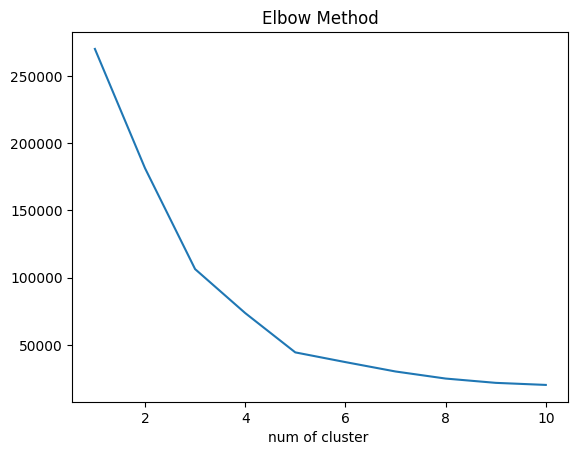

In [17]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("num of cluster ")
plt.show()

model training after know the best clusters num


In [18]:
x=data[[ 'Annual Income (k$)','Spending Score (1-100)']]

In [19]:
k_means=KMeans(n_clusters=5,random_state=42)
y_means=k_means.fit_predict(x)

In [20]:
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

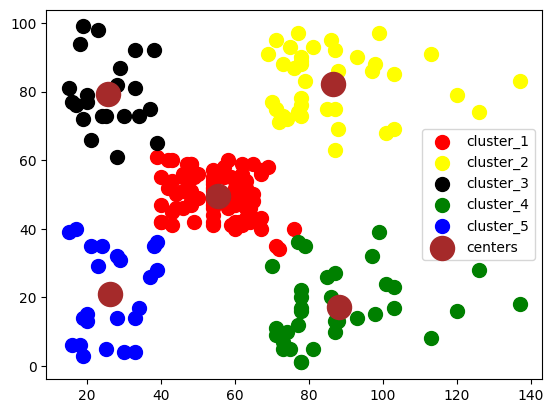

In [21]:
plt.scatter(x.iloc[y_means==0,0],x.iloc[y_means==0,1],s=100,c="red",label="cluster_1")
plt.scatter(x.iloc[y_means==1,0],x.iloc[y_means==1,1],s=100,c="yellow",label="cluster_2")
plt.scatter(x.iloc[y_means==2,0],x.iloc[y_means==2,1],s=100,c="black",label="cluster_3")
plt.scatter(x.iloc[y_means==3,0],x.iloc[y_means==3,1],s=100,c="green",label="cluster_4")
plt.scatter(x.iloc[y_means==4,0],x.iloc[y_means==4,1],s=100,c="blue",label="cluster_5")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c="brown",label="centers")
plt.legend()
plt.show()

use Hierarchical clustering

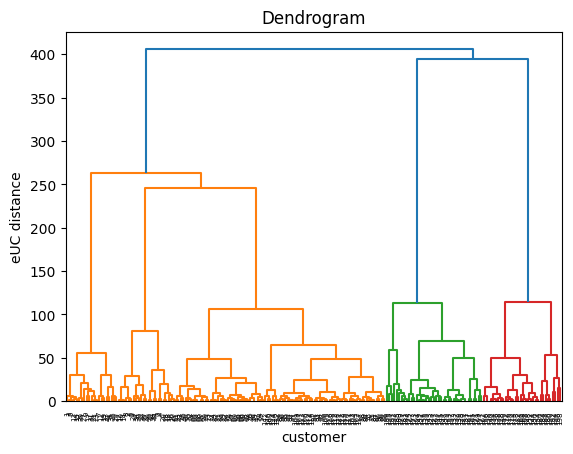

In [22]:
dendrogram=sch.dendrogram(sch.linkage(x,method="ward"))
plt.title("Dendrogram")
plt.xlabel("customer")
plt.ylabel("eUC distance")
plt.show()

In [23]:
hc = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
y_hc = hc.fit_predict(x)

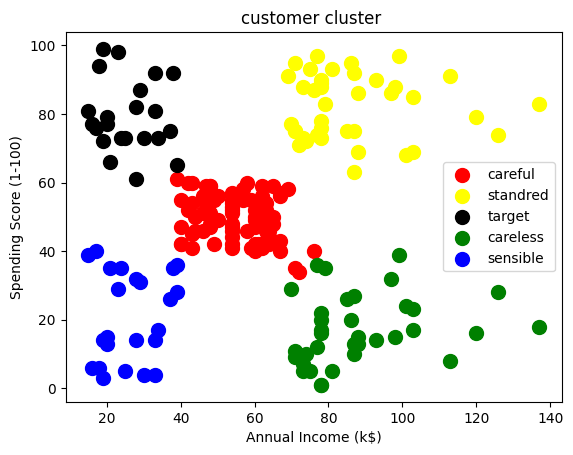

In [24]:
plt.scatter(x.iloc[y_means==0,0],x.iloc[y_means==0,1],s=100,c="red",label="careful")
plt.scatter(x.iloc[y_means==1,0],x.iloc[y_means==1,1],s=100,c="yellow",label="standred")
plt.scatter(x.iloc[y_means==2,0],x.iloc[y_means==2,1],s=100,c="black",label="target")
plt.scatter(x.iloc[y_means==3,0],x.iloc[y_means==3,1],s=100,c="green",label="careless")
plt.scatter(x.iloc[y_means==4,0],x.iloc[y_means==4,1],s=100,c="blue",label="sensible")
plt.title("customer cluster ")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

Thanks.
😊 

🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀 ____ Mahmoud Mohamed Rady.     ___ Junior Data Scientist  (ML Eng) ___
12/2023 ____ 🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀

https://www.linkedin.com/in/mahmoud-rady-084426243